In [11]:
from softpotato import *
import softpotato as sp

import numpy as np
import matplotlib.pyplot as plt

In [12]:
sr = np.linspace(0.1,1,4)
ns = np.size(sr)

i = []
for x in range(ns):
    wf = sp.tech.Sweep(Eini=0.5, Efin=-0.5, sr=sr[x], dE=0.01)
    macro = sp.sim.Macro(wf)
    macro.Emech()
    macro.BI(dX=1e-3)
    i.append(macro.i)
i = np.array(i).T


In [13]:
iPk = np.min(i,axis=0) # Min because is a reduction

# Calculating real Randles Sevcik for comparison:
macro = sp.calc.Macro()
iPk_real = macro.RandlesSevcik(sr)

iRS = np.array([iPk, iPk_real]).T

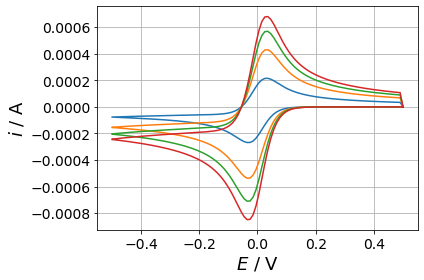

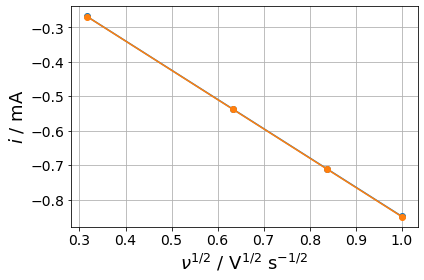

In [14]:
sp.plot.plot(wf.E, i, fig=1)
sp.plot.plot(np.sqrt(sr), iRS*1e3, xlab=r'$\nu^{1/2}$ / V$^{1/2}$ s$^{-1/2}$', ylab='$i$ / mA', mark='-o', fig=2)

In [15]:
Ageo = 1
Rf = 5 # Roughness factor
C = 20e-6 # F/cm2, specific capacitance
x = 0.1 # cm, Luggin electrode distance
kapa = 0.0632 # Ohm-1 cm-1, conductivity for 0.5 M NaCl
Cdl = Ageo*Rf*C # F, double layer capacitance
Ru = x/(kapa*Ageo) # Ohms, solution resistance

CdlRu = [Cdl, Ru]

wf = sp.tech.Sweep(Eini=0.25, Efin=-0.25, sr=0.01, dE=0.00001)
#macro = sp.sim.Macro(wf)
#macro.Emech(Ageo=Ageo, CdlRu=CdlRu)
#macro.BI(dX=1e-2)
#sp.plot.plot(wf.E, macro.i, fig=3)
#plt.ylim([-0.0003, 0.0003])